In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Load the dataset
dataset = pd.read_csv("//home//lydianjay//Documents//Data mining//dataset//penguins.csv")
dataset.replace('NA', np.nan, inplace = True)
dataset.replace(' ', np.nan, inplace = True)
dataset.dropna( inplace = True, how = 'any')
dataset = dataset[dataset.sex != '.']

X = dataset[ ["flipper_length_mm"] ].loc[ dataset["species"] == "Gentoo"]

y = dataset["body_mass_g"].loc[ dataset["species"] == "Gentoo" ] # target

In [56]:
dataset.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

linear_reg = LinearRegression()
knn = KNeighborsClassifier(n_neighbors=2)
svr_reg = SVR()

linear_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)

linear_preds = linear_reg.predict(X_test)
knn_preds = knn.predict(X_test)
svr_preds = svr_reg.predict(X_test)


linear_r2 = r2_score(y_test, linear_preds)
svr_r2 = r2_score(y_test, svr_preds)
knn_r2 = r2_score(y_test, knn_preds)

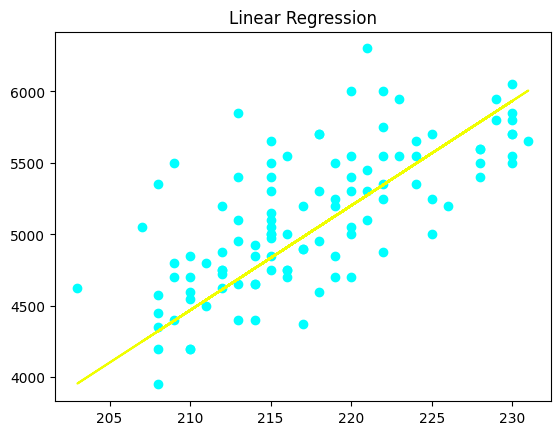

In [58]:
plt.title("Linear Regression")
plt.scatter(X_test, y_test, color = "#00ffff")
plt.plot(X_test, linear_preds, color = "#f0ff00")

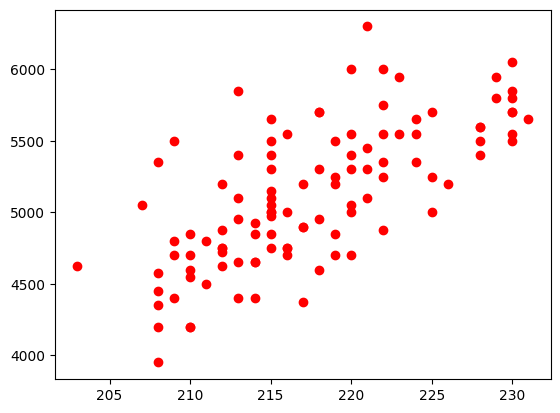

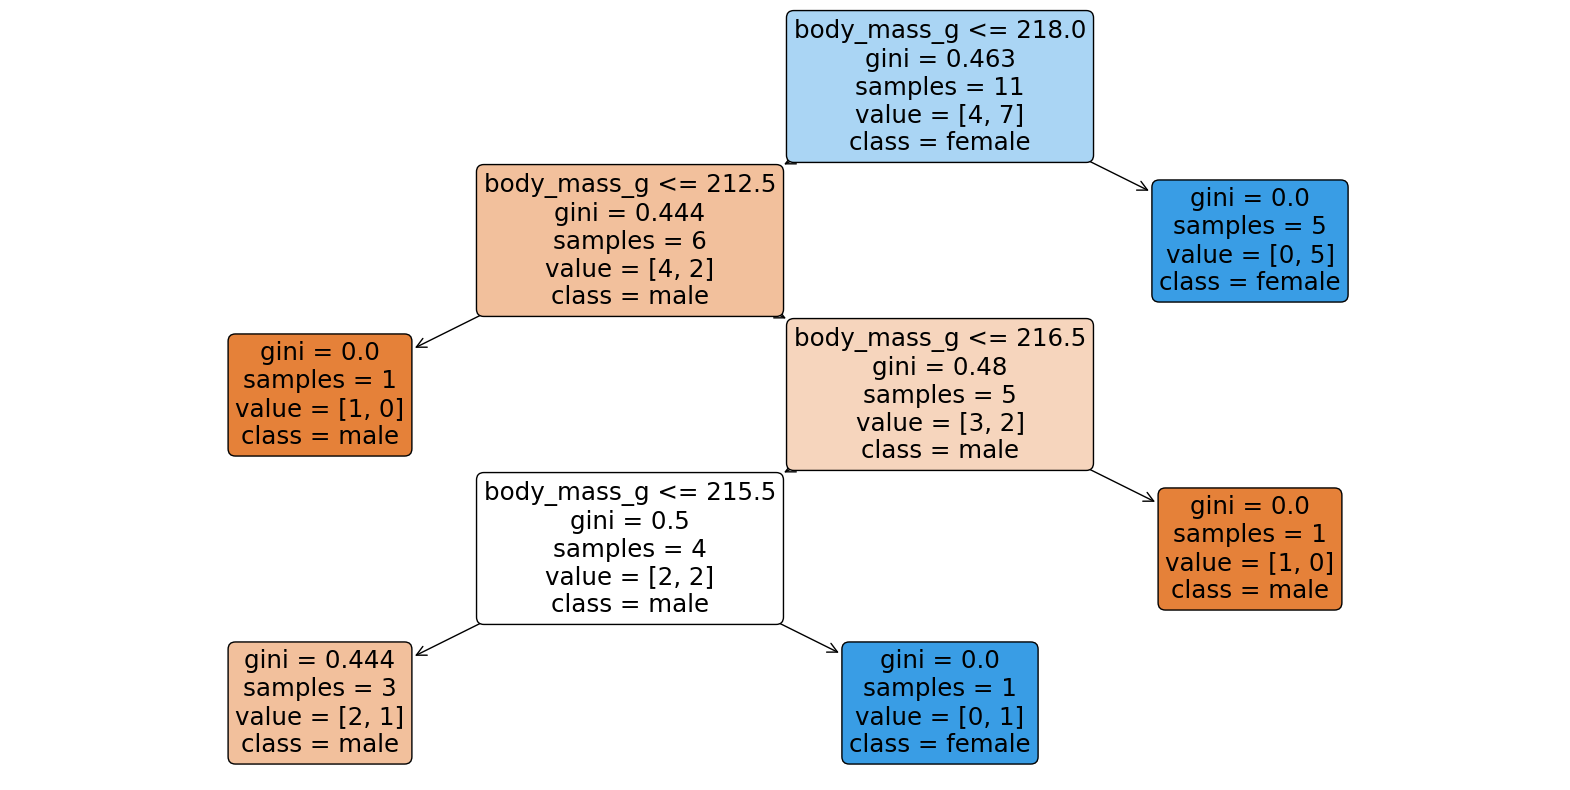

In [50]:
x = dataset[ ["body_mass_g", "flipper_length_mm", "bill_length_mm"] ].loc[ dataset["species"] == "Gentoo"]
y = dataset["sex"].loc[ dataset["species"] == "Gentoo" ] # target
des_tree = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
des_tree.fit(X_train, y_train)
des_tree_preds = des_tree.predict(X_test)

des_tree_score = accuracy_score(y_test, des_tree_preds)


plt.figure(figsize=(20,10))
plot_tree(des_tree, feature_names=["body_mass_g", "flipper_length_mm", "bill_length_mm"], class_names=["male", "female"], filled=True, rounded=True)
plt.show()

In [71]:
print("KNN R2 Score: ", knn_r2) 
print("SVR R2 Score: ", svr_r2) 
print("Decision Tree Score: ", des_tree_score) 
print("Linear Regression R2 Score: ", linear_r2)

KNN R2 Score:  0.09813309516220581
SVR R2 Score:  -0.16217549569422052
Decision Tree Score:  0.7962962962962963
Linear Regression R2 Score:  0.2725665935291265
